<a href="https://colab.research.google.com/github/atikahlestar/Data-Analysis/blob/main/Kasus_1_Toko_Buku_Online_%22BukuKita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kasus 01 : Toko Buku Online
BukuKita adalah sebuah toko buku online yang cukup populer di Indonesia. Mereka menjual berbagai jenis buku, mulai dari komik, novel, hingga buku pendidikan. Sebagai bagian dari strategi bisnis mereka, tim Data Analyst BukuKita sedang melakukan analisis terhadap 100 data penjualan yang berisi informasi seperti No. Pelanggan, Jumlah Pesanan, Total Pembelanjaan, dan Jenis Buku. Tim berharap dapat memahami lebih dalam tentang pola pembelian pelanggan dan kontribusi setiap jenis buku terhadap pendapatan toko.

Dari hasil analisis tersebut, tim ingin menjawab beberapa pertanyaan penting untuk
menyusun strategi bisnis ke depan. Bantulah mereka menjawab pertanyaan-pertanyaan
berikut ini:
1. Tim BukuKita menduga bahwa sejumlah kecil pelanggan mungkin menyumbang
sebagian besar pendapatan mereka. Mereka ingin mengetahui apakah hipotesis ini
benar dengan menganalisis distribusi kontribusi pelanggan terhadap total nilai
transaksi (GMV). Apakah terdapat kelompok kecil pelanggan yang mendominasi
GMV?
2. BukuKita menjual berbagai jenis buku, termasuk komik, novel, manga, kitab suci,
dan buku pendidikan. Tim Data Analyst ingin mengetahui apakah ada kategori buku
tertentu yang lebih banyak diminati dan menyumbang pendapatan lebih besar. Dari
data penjualan yang ada, bagaimana pola pembelian berdasarkan jenis buku?
Apakah ada satu atau lebih kategori buku yang mendominasi total nilai transaksi?
3. BukuKita mengamati bahwa ada pelanggan yang memesan dalam jumlah besar,
tetapi mereka tidak yakin apakah jumlah pesanan yang tinggi selalu berkorelasi
dengan total belanja yang lebih besar. Dengan menggunakan data penjualan yang
ada, bantu tim Data Analyst memeriksa hubungan antara jumlah pesanan dengan
nilai transaksi (GMV). Apakah pelanggan yang melakukan jumlah pesanan lebih
banyak juga menghasilkan nilai transaksi yang lebih besar?
4. Setiap pelanggan BukuKita memiliki kontribusi yang berbeda-beda terhadap total
GMV. Tim Data Analyst ingin mengetahui apakah ada pelanggan tertentu yang
sangat mendominasi nilai transaksi toko. Mereka juga ingin melihat apakah distribusi
kontribusi pelanggan terhadap GMV cenderung merata atau hanya beberapa
pelanggan yang menyumbang lebih banyak dari yang lain.

## Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/Shared drives/atikahlestari31/Project/Dataset/Dataset Bukukita.csv'

In [ ]:
df = pd.read_csv(file_path)
df.head()

,No. Pelanggan,Jumlah Pesanan,Total Belanja,Jenis Buku
0,1,15,"Rp 1,858,795",Komik
1,2,15,"Rp 1,958,279",Pendidikan
2,3,15,"Rp 1,904,515",Komik
3,4,14,"Rp 1,882,220",Novel
4,5,14,"Rp 2,026,773",Komik


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   No. Pelanggan   100 non-null    int64 
 1   Jumlah Pesanan  100 non-null    int64 
 2   Total Belanja   100 non-null    object
 3   Jenis Buku      100 non-null    object
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


In [ ]:
df.dtypes

,0
No. Pelanggan,int64
Jumlah Pesanan,int64
Total Belanja,object
Jenis Buku,object


In [ ]:
df.isnull().sum()

,0
No. Pelanggan,0
Jumlah Pesanan,0
Total Belanja,0
Jenis Buku,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
# Membersihkan data
df["Total Belanja"] = df["Total Belanja"].replace({'Rp': '', ',': ''}, regex=True).astype(float)

In [ ]:
# Mengonversi ke tipe int64
df["Total Belanja"] = df["Total Belanja"].astype(np.int64)

In [ ]:
df.head()

,No. Pelanggan,Jumlah Pesanan,Total Belanja,Jenis Buku
0,1,15,1858795,Komik
1,2,15,1958279,Pendidikan
2,3,15,1904515,Komik
3,4,14,1882220,Novel
4,5,14,2026773,Komik


## Soal 1
Tim BukuKita menduga bahwa sejumlah kecil pelanggan mungkin menyumbang sebagian besar pendapatan mereka. Mereka ingin mengetahui apakah hipotesis ini benar dengan menganalisis distribusi kontribusi pelanggan terhadap total nilai transaksi (GMV). Apakah terdapat kelompok kecil pelanggan yang mendominasi GMV?

### Jawab :

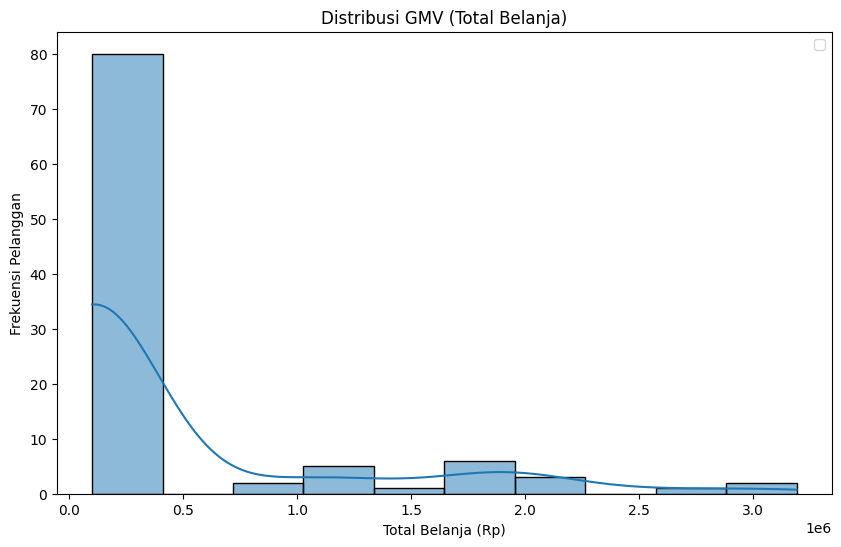

In [ ]:
## Visualisasi
plt.figure(figsize=(10, 6))
sns.histplot(df["Total Belanja"], kde=True, bins=10)
plt.xlabel("Total Belanja (Rp)")
plt.ylabel("Frekuensi Pelanggan")
plt.title("Distribusi GMV (Total Belanja)")
plt.legend()
plt.show()

### Analisis :

- 1. Mayoritas Pelanggan memiliki GMV Rendah
    - Sebagian besar pelanggan memiliki nilai transaksi rendah (GMV). Hal ini ditujukkan oleh tingginya frekuensi pada nilai GMV yang mendekati nol atau relatif rendah.
    - Ini menunjukkan bahwa sebagian besar pelanggan melakukan pembelian hanya dalam jumlah kecil atau hanya sesekali belanja.
- 2. Distribusi Tidak Merata dan Memiliki Skewness Positif
    - Distribusi GMV memiliki kemiringan (skew) positif yang kuat, dimana sebagian nilai berada di sumbu x, dengan sedikit memiliki GMV tinggi.
    - Hal ini menunjukkan bahwa hanya sedikit pelanggan yang membeli atau menyumbang nilai transaksi lebih besar dibandingkan mayoritas pelanggan lainnya.
- 3. Peluang Segmentasi dan Fokus pada Pelanggan Besar
    - Dengan adanya sebagian pelanggan memiliki GMV tinggi, ini bisa menjadi indikasi bahwa adanya pelanggan tertentu yang berharga bagi toko dengan kontribusi total terhadap GMV.
- 4. Konfirmasi Distribusi Pareto (80/20 Rule)
    - Dimana sekitar 20% pelanggan berkontribusi terhadap 80% dari total GMV.
    
20% pelanggan dengan total belanja tertinggi menyumbang sekitar 80% dari total nilai transaksi (Gross Merchandise Value).
Hal ini menunjukkan bahwa sekelompok kecil pelanggan memang mendominasi GMV di BukuKita, yang berarti sebagian besar pendapatan berasal dari sejumlah kecil pelanggan setia yang berbelanja dalam jumlah besar.


## Soal 2
BukuKita menjual berbagai jenis buku, termasuk komik, novel, manga, kitab suci, dan buku pendidikan. Tim Data Analyst ingin mengetahui apakah ada kategori buku tertentu yang lebih banyak diminati dan menyumbang pendapatan lebih besar. Dari data penjualan yang ada, bagaimana pola pembelian berdasarkan jenis buku? Apakah ada satu atau lebih kategori buku yang mendominasi total nilai transaksi?


### Jawab :

<ipython-input-31-87b31a22229c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Jenis Buku", y="Total Belanja", data=df, ci=None, estimator =sum)


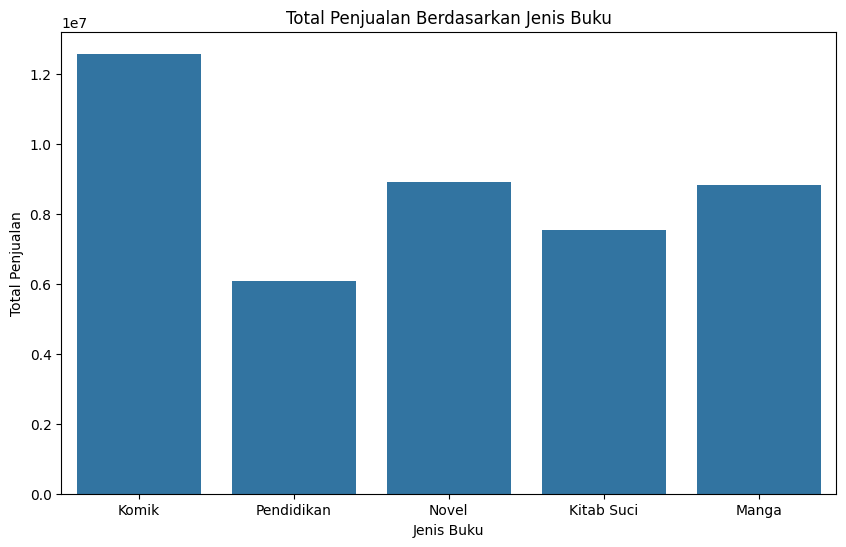

In [ ]:
## Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(x="Jenis Buku", y="Total Belanja", data=df, ci=None, estimator =sum)
plt.xlabel("Jenis Buku")
plt.ylabel("Total Penjualan")
plt.title("Total Penjualan Berdasarkan Jenis Buku")
plt.show()

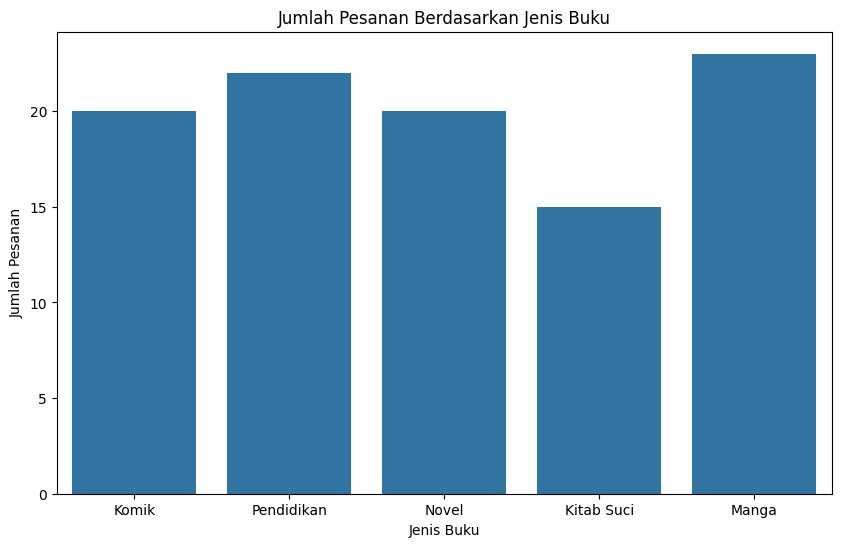

In [ ]:
## Visualisasi
plt.figure(figsize=(10,6))
sns.countplot(x="Jenis Buku", data=df)
plt.xlabel("Jenis Buku")
plt.ylabel("Jumlah Pesanan")
plt.title("Jumlah Pesanan Berdasarkan Jenis Buku")
plt.show()

### Analisis :

- 1. Total Penjualan Berdasarkan Jenis Buku: Kategori Komik memiliki total penjualan tertinggi, diikuti oleh Novel, Manga, dan Kitab Suci. Kategori Pendidikan memiliki total penjualan yang lebih rendah dibanding kategori lainnya.
- 2. Jumlah Pesanan Berdasarkan Jenis Buku: Manga juga mendominasi dari segi jumlah pesanan, diikuti oleh Pendidikan, komik, Novel, dan Kitab Suci.



## Soal 3
BukuKita mengamati bahwa ada pelanggan yang memesan dalam jumlah besar, tetapi mereka tidak yakin apakah jumlah pesanan yang tinggi selalu berkorelasi dengan total belanja yang lebih besar. Dengan menggunakan data penjualan yang ada, bantu tim Data Analyst memeriksa hubungan antara jumlah pesanan dengan nilai transaksi (GMV). Apakah pelanggan yang melakukan jumlah pesanan lebih banyak juga menghasilkan nilai transaksi yang lebih besar?


### Jawab :

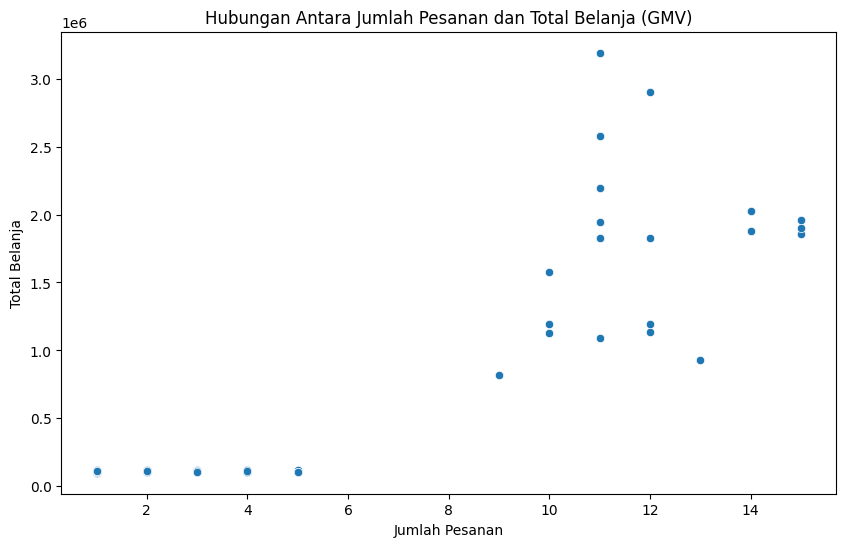

In [ ]:
## Visualisasi
plt.figure(figsize=(10,6))
sns.scatterplot(x="Jumlah Pesanan", y="Total Belanja", data=df)
plt.xlabel("Jumlah Pesanan")
plt.ylabel("Total Belanja")
plt.title("Hubungan Antara Jumlah Pesanan dan Total Belanja (GMV)")
plt.show()

### Analisis :

Hasil analisis menunjukkan bahwa terdapat korelasi positif yang kuat antara Jumlah Pesanan dan Total Belanja dengan nilai korelasi sebesar 0.86. Ini berarti bahwa pelanggan yang melakukan lebih banyak pesanan cenderung menghasilkan nilai transaksi yang lebih besar.


## Soal 4
Setiap pelanggan BukuKita memiliki kontribusi yang berbeda-beda terhadap total GMV. Tim Data Analyst ingin mengetahui apakah ada pelanggan tertentu yang sangat mendominasi nilai transaksi toko. Mereka juga ingin melihat apakah distribusi kontribusi pelanggan terhadap GMV cenderung merata atau hanya beberapa pelanggan yang menyumbang lebih banyak dari yang lain.

### Jawab :

In [ ]:
## Menghitung Total GMV per Pelanggan
customer_gmv = df.groupby("No. Pelanggan")["Total Belanja"].sum().reset_index()
customer_gmv = customer_gmv.sort_values(by="Total Belanja", ascending=False)

- 1. Pareto Chart (Cumulative percentage plot)

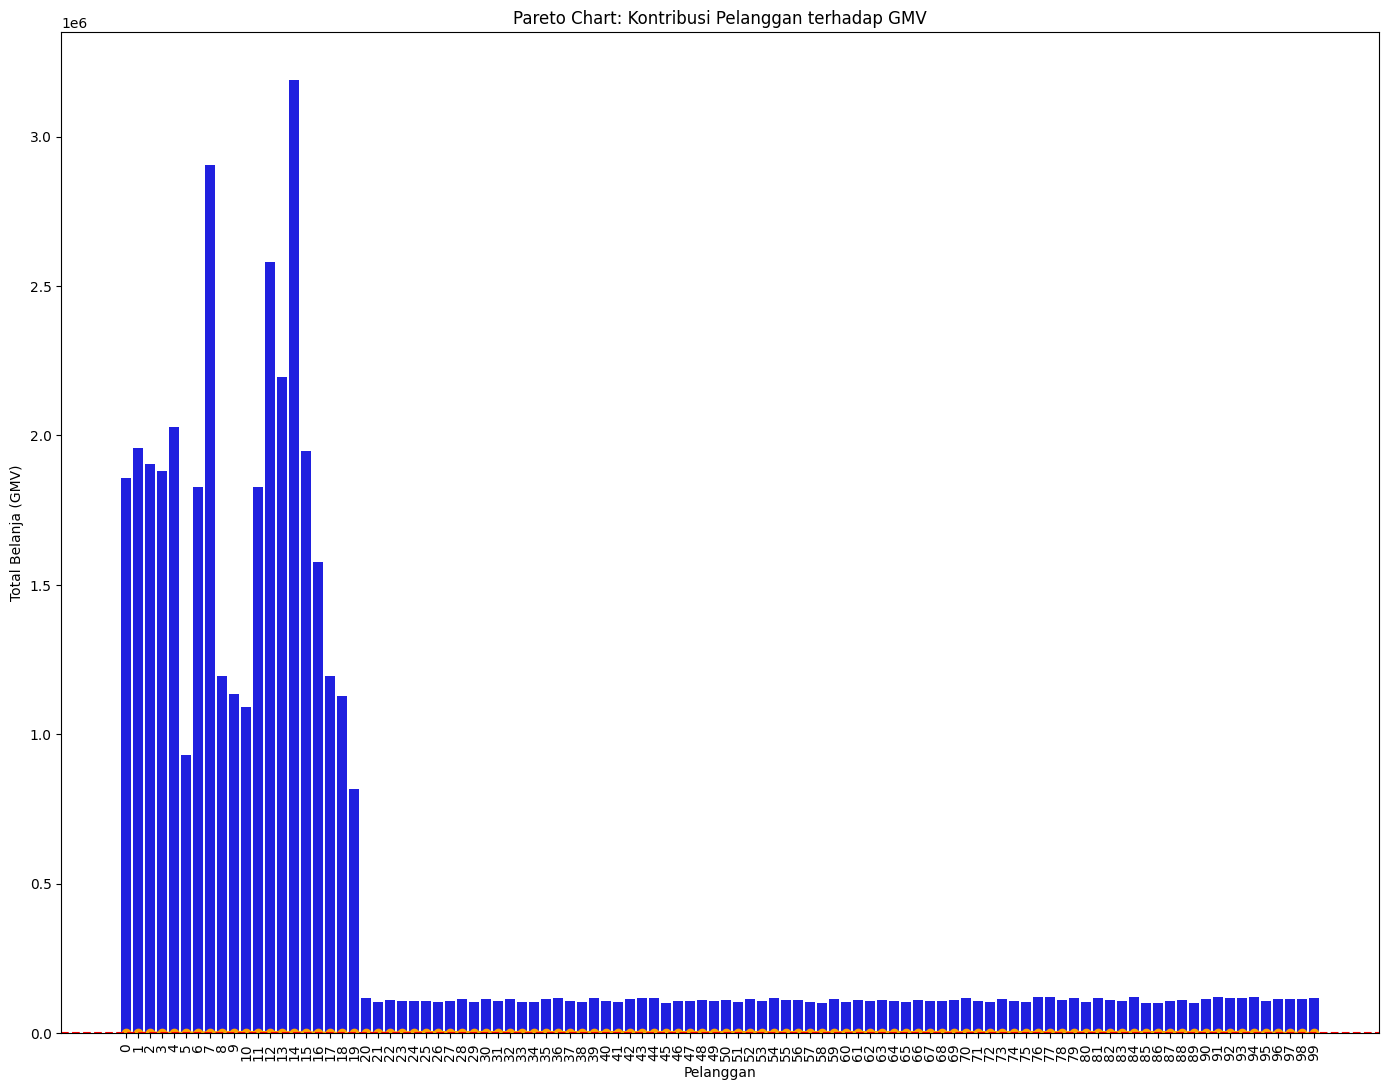

In [ ]:
customer_gmv["Cumulative Percentage"] = customer_gmv["Total Belanja"].cumsum() / customer_gmv["Total Belanja"].sum() * 100
# Plot Pareto Chart (Cumulative Percentage Plot)
plt.figure(figsize=(17, 13))
sns.barplot(x=customer_gmv.index, y="Total Belanja", data=customer_gmv, color="blue")
plt.plot(customer_gmv.index, customer_gmv["Cumulative Percentage"], color="orange", marker="o")
plt.xlabel("Pelanggan")
plt.ylabel("Total Belanja (GMV)")
plt.title("Pareto Chart: Kontribusi Pelanggan terhadap GMV")
plt.axhline(80, color="red", linestyle="--", label="80% GMV Target")
plt.xticks(rotation=90)
plt.show()

### Analisis :

Grafik Pareto ini dengan jelas menunjukkan bahwa sebagian kecil pelanggan bertanggung jawab atas sebagian besar GMV. Dengan memahami dan memfokuskan pada segmen pelanggan dengan kontribusi tinggi ini, BukuKita dapat mengalokasikan sumber daya dengan lebih strategis untuk mempertahankan pelanggan-pelanggan tersebut dan berpotensi meningkatkan kontribusi mereka lebih lanjut.

- 2. Top 10 Pelanggan dengan Kontribusi GMV Tertinggi

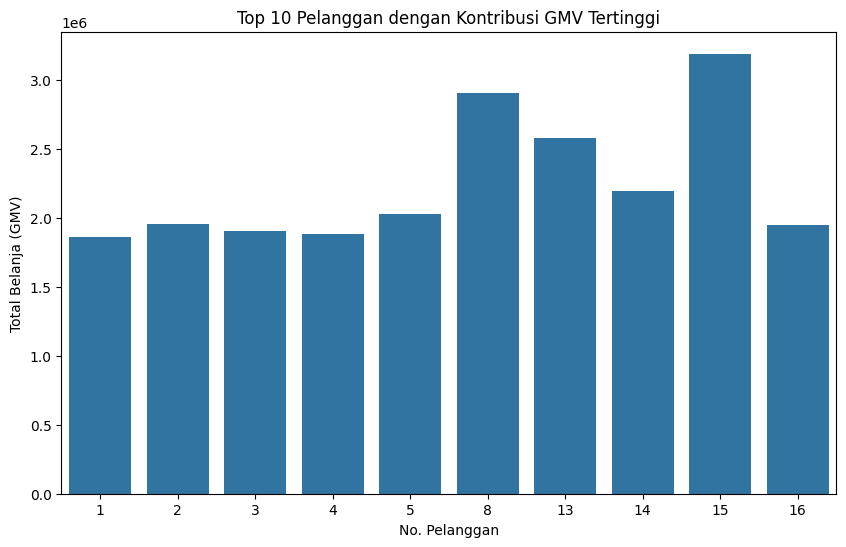

In [ ]:
top_10 = customer_gmv.head(10)
plt.figure(figsize=(10,6))
sns.barplot(x="No. Pelanggan", y="Total Belanja", data=top_10)
plt.xlabel("No. Pelanggan")
plt.ylabel("Total Belanja (GMV)")
plt.title("Top 10 Pelanggan dengan Kontribusi GMV Tertinggi")
plt.show()

### Analisis :

Grafik ini membantu mengidentifikasi pelanggan dengan kontribusi tertinggi terhadap GMV. Dengan memfokuskan pada pelanggan bernilai tinggi ini, BukuKita dapat mengoptimalkan strategi retensi dan meningkatkan loyalitas mereka, sehingga berpotensi meningkatkan pendapatan lebih lanjut.

## Kesimpulan

Secara keseluruhan, hasil ini menunjukkan bahwa fokus pada peningkatan jumlah pesanan per pelanggan dapat secara langsung berdampak positif pada peningkatan total belanja mereka. Oleh karena itu, strategi pemasaran yang mendorong peningkatan jumlah pesanan per transaksi sangat relevan untuk diterapkan.